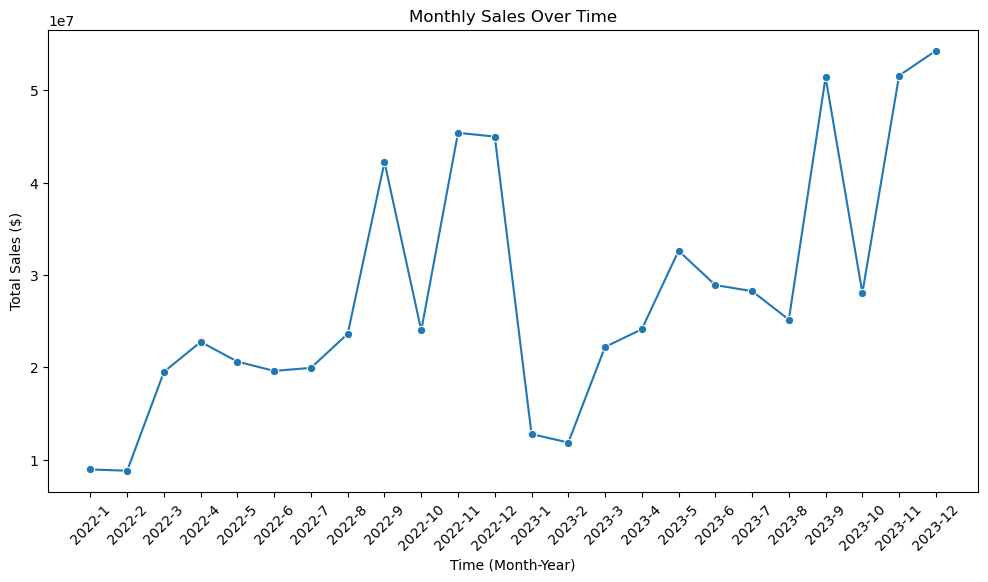

Mean Squared Error: 125179263763964.25
R-squared: 0.31349500376326267

Model Summary:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     19.05
Date:                Tue, 05 Nov 2024   Prob (F-statistic):            0.00228
Time:                        17:40:00   Log-Likelihood:                -255.35
No. Observations:                  16   AIC:                             532.7
Df Residuals:                       5   BIC:                             541.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

C:\Users\spenc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


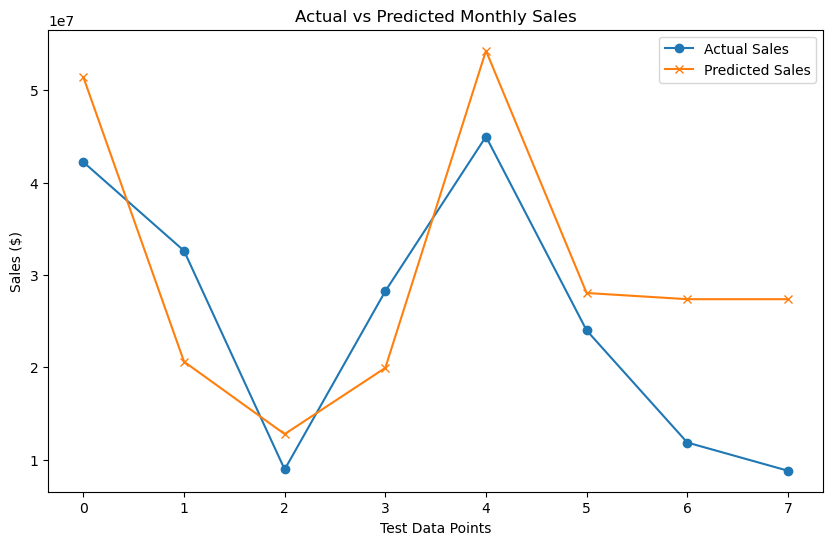

In [37]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/spenc/Downloads/car_sales.xlsx'  # Update with the correct path
car_sales_df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert 'Date' column to datetime format and extract month and year
car_sales_df['Date'] = pd.to_datetime(car_sales_df['Date'])
car_sales_df['Month'] = car_sales_df['Date'].dt.month
car_sales_df['Year'] = car_sales_df['Date'].dt.year

# Aggregate monthly sales to capture seasonal trends
monthly_sales = car_sales_df.groupby(['Year', 'Month'])['Price ($)'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

# Visualize the aggregated monthly sales data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Price ($)', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Total Sales ($)')
plt.show()

# Prepare data for regression analysis
# Encode 'Month' as a categorical feature to capture seasonality
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # Convert to string for one-hot encoding
month_encoded = pd.get_dummies(monthly_sales['Month'], prefix='Month')

# Combine encoded month data with sales data
X = month_encoded  # Features: one-hot encoded month
y = monthly_sales['Price ($)'].astype(float).values  # Ensure target is numeric and a numpy array

# Add a constant term for the regression model (intercept)
X = sm.add_constant(X).astype(float)  # Ensure all values in X are floats

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Predict sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nModel Summary:\n", model.summary())

# Sort test data and predictions by the index for plotting continuity
y_test_sorted = pd.Series(y_test).reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred).reset_index(drop=True)

# Visualize actual vs predicted sales in sorted order
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label="Actual Sales", marker='o')
plt.plot(y_pred_sorted, label="Predicted Sales", marker='x')
plt.title("Actual vs Predicted Monthly Sales")
plt.xlabel("Test Data Points")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()
